In [590]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from os import sys
sys.path.append('..')
import vnn
import vec_models
import nonvec_models

import torch.nn as nn

In [740]:
data = torch.load('../experiments/models2/cifar_nonvec_fc_df_mono/epoch_10.pt', map_location='cpu')


In [741]:
sd = data['model_state_dict']
model = nonvec_models.make_cifar_nonvec_fc(True)
model.load_state_dict(sd, strict=False)


_IncompatibleKeys(missing_keys=[], unexpected_keys=['sequential.10.feedback_matrix'])

In [758]:
data = torch.randn(1, 3*32*32)
#input = vnn.expand_input(data, 10)

with torch.no_grad():
    output = model(data)

In [759]:
output

tensor([[42.2634, 40.9007, 44.3030, 42.2410, 43.4907, 43.0444, 44.7183, 41.2264,
         42.1297, 40.8929]])

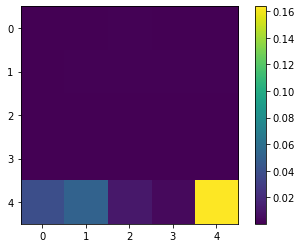

In [598]:
W.shape
plt.imshow(W[0, 0])
plt.colorbar()

In [475]:
C = np.zeros((64, 128, 9, 9))
for i1 in range(64):
    for i2 in range(128):
        f = W[i1, i2]
        f = f - f.mean()
        if f.std() < 1e-6:
            continue
        #f = f / f.std()
        c = correlate2d(f, f)
        c = c / np.max(c)
        C[i1, i2] = c



In [469]:
avg_mixed = C.mean(axis=(0, 1))

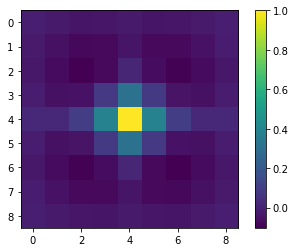

In [454]:
plt.imshow(avg)
plt.colorbar()

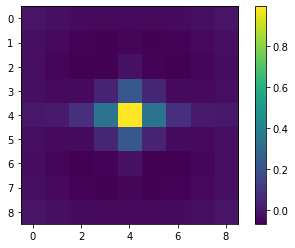

In [462]:
plt.imshow(avg)
plt.colorbar()

In [476]:
avg_mono = C.mean(axis=(0, 1))

In [477]:
diff = avg_mixed - avg_mono

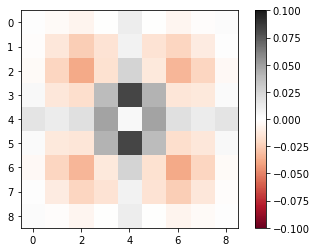

In [483]:
plt.imshow(diff, vmin=-0.1, vmax=0.1, cmap="RdGy")
plt.colorbar()